In [59]:
#This is all of the library we need for this report
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
import missingno as msgo
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import missingno as msgo
import seaborn as sns
from sklearn.linear_model import LinearRegression
#import geopandas as gpd
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
covid_df = pd.read_csv('covid_vaccination_vs_death_ratio.csv')
covid_df.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,5/11/2021,504502,448878,55624,12,40094444,1.119552
1,1,Afghanistan,AFG,5/20/2021,547901,470341,77560,10,40094444,1.173083
2,2,Afghanistan,AFG,5/24/2021,573277,476367,96910,10,40094444,1.188112
3,3,Afghanistan,AFG,5/26/2021,590454,479372,111082,19,40094444,1.195607
4,4,Afghanistan,AFG,5/27/2021,593313,479574,113739,14,40094444,1.196111


In [61]:
covid_df.shape

(20332, 10)

In [62]:
type(covid_df)

pandas.core.frame.DataFrame

regression for dataset

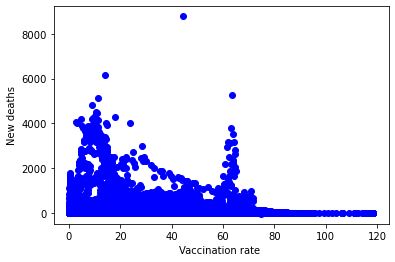

In [125]:
main_df = covid_df
plt.scatter ( covid_df.ratio, covid_df.New_deaths,color = 'blue')
figsize=(10,10)
plt.xlabel("Vaccination rate ")
plt.ylabel("New deaths")
plt.show()

In [121]:
regress = linear_model.LinearRegression()
train_x = np.asanyarray(main_df[['ratio']])
train_y = np.asanyarray(main_df[['New_deaths']])
regress.fit (train_x, train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[-1.6044371]]
Intercept:  [156.78763083]


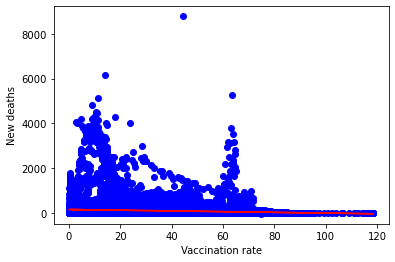

In [123]:
plt.scatter(main_df.ratio, main_df.New_deaths,  color='blue')
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], color='red')
figsize=(10,10)
plt.xlabel("Vaccination rate")
plt.ylabel("New deaths")
plt.show()

# Evaluation

In [127]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(main_df[['ratio']])
test_y = np.asanyarray(main_df[['New_deaths']])
test_y_ = regress.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 149.17
Residual sum of squares (MSE): 123028.86
R2-score: 0.01


# Saudi Arabia

Text(0.5, 1.0, 'ratio vs New_deaths KSA')

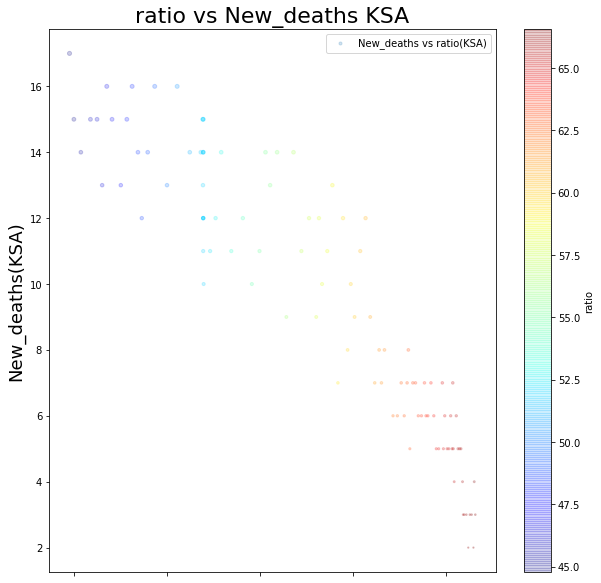

In [32]:
df_ksa = covid_df[covid_df['country']=='Saudi Arabia']
df_ksa.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(KSA)',
    alpha=0.2,
    figsize=(10,10),
    s=df_ksa['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(KSA)',fontsize=18)
plt.title('ratio vs New_deaths KSA',fontsize=22)
# The radius of each circle represents the district’s 
#population (option s), and the color represents the price (option c).

Text(0.5, 1.0, 'ratio vs New_deaths Bahrain')

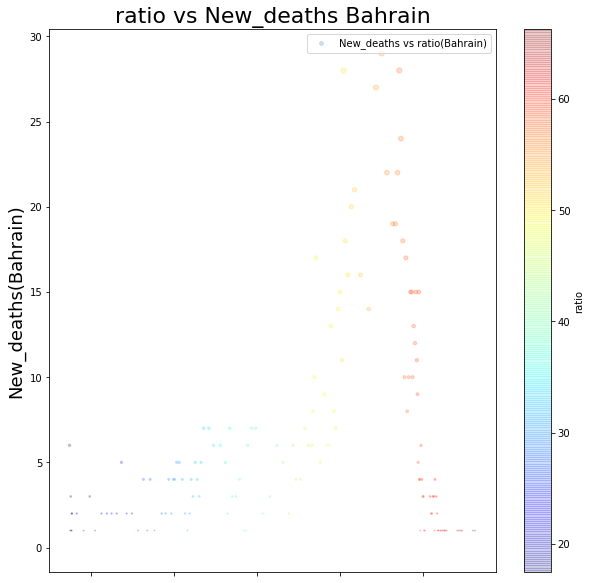

In [83]:
df_BHR = covid_df[covid_df['country']=='Bahrain']
df_BHR.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(Bahrain)',
    alpha=0.2,
    figsize=(10,10),
    s=df_BHR['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths(Bahrain)',fontsize=18)
plt.title('ratio vs New_deaths Bahrain',fontsize=22)

# Modeling:

# 1- LinearRegression

In [35]:
# define x,y
x = df_ksa[['ratio']]
y = df_ksa[['New_deaths']]

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Standard Normalization(x)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.fit_transform(x_test)

# Standard Normalization(y)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.fit_transform(y_test)





#Model lineaRegression
#fitting in
liner = LinearRegression()
liner.fit(x_train,y_train)

# coefficients
print ('Coefficients: ', liner.coef_)
print ('Intercept: ',liner.intercept_)

# prediction
y_pre = std_y.inverse_transform(liner.predict(x_test))# inverse to original value
print('The prediction of New Deaths is :\n',y_pre)

Coefficients:  [[-0.91536223]]
Intercept:  [-9.41411272e-16]
The prediction of New Deaths is :
 [[12.59393878]
 [ 6.61661136]
 [ 6.73222252]
 [ 8.23460533]
 [ 9.3997963 ]
 [ 4.81140106]
 [ 4.37773882]
 [ 9.10051057]
 [14.74213826]
 [16.63346928]
 [12.66901127]
 [12.58278443]
 [ 5.04320787]
 [ 4.74558849]
 [ 5.71858785]
 [15.80180166]
 [ 5.48414848]
 [12.22211967]
 [14.45127612]
 [12.59624505]
 [ 4.59097194]
 [ 8.02403011]
 [12.59804761]
 [ 5.81049959]
 [ 9.62980055]
 [ 6.1003274 ]
 [13.68911964]]


Text(0.5, 1.0, 'Liner Regression')

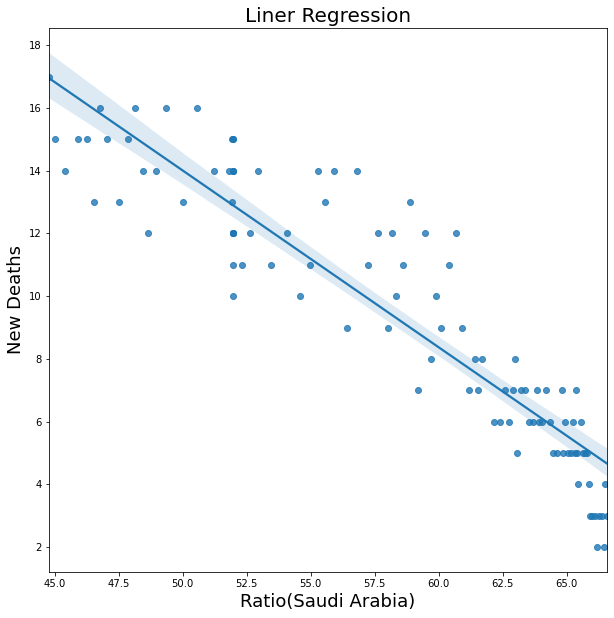

In [36]:
X = df_ksa['ratio']
y = df_ksa['New_deaths']

plt.figure(figsize=(10,10))
sns.regplot(x=X, y=y)

plt.xlabel('Ratio(Saudi Arabia)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

In [39]:
mse = mean_squared_error(std_y.inverse_transform(y_test),y_pre)

# make sure the output not show with scientific notation
def as_float(x):
    y='{:.50f}'.format(x)
    return  y

print('The Mean Squared Error(MSE) of y_pre is :',as_float(mse))

The Mean Squared Error(MSE) of y_pre is : 2.08065331912758066934543421666603535413742065429688


In [40]:
mae = mean_absolute_error(std_y.inverse_transform(y_test),y_pre)
print('The Mean Absolute Error(MAE) of y_pre is :',as_float(mae))

The Mean Absolute Error(MAE) of y_pre is : 1.12947398173506607932381484715733677148818969726562


In [41]:
# Define x,y
X = df_ksa[['ratio']]
y = df_ksa[['New_deaths']]


In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [43]:
# Standard Normalization
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


y_train = std.fit_transform(y_train)
y_test = std.fit_transform(y_test)

In [44]:
# Instantiate model
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# Coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[-0.91689726]]
Intercept:  [9.52520134e-16]


In [46]:
# Prediction
y_pred = std.inverse_transform(model.predict(X_test))

Text(0.5, 1.0, 'Liner Regression')

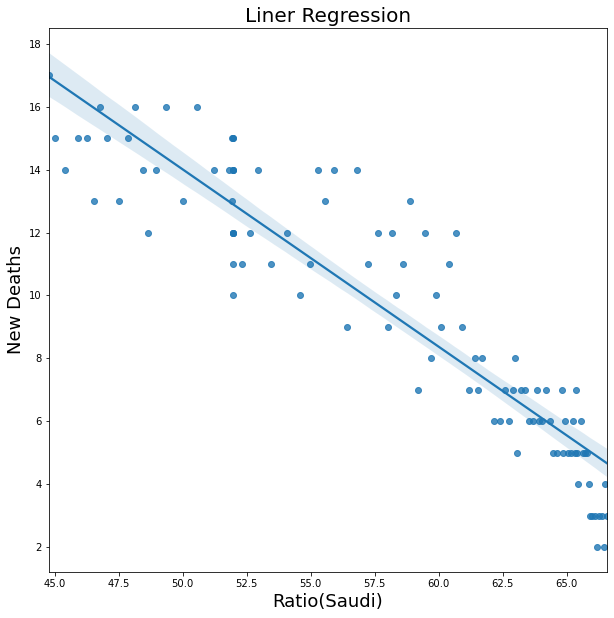

In [48]:
# Plot result

X = df_ksa['ratio']
y = df_ksa['New_deaths']

plt.figure(figsize=(10,10))
sns.regplot(x=X, y=y)

plt.xlabel('Ratio(Saudi)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

# Evaluation

In [53]:
# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

In [54]:
show_scores(model)

{'Training MAE': 0.321115602319692,
 'Test MAE': 0.27395808885271405,
 'Training R^2': 0.8407005835629509,
 'Test R^2': 0.8821429838501796}

# Bahrain

In [84]:
# Define x,y
X = df_BHR[['ratio']]
y = df_BHR[['New_deaths']]

In [85]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [86]:
# Standard Normalization
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


y_train = std.fit_transform(y_train)
y_test = std.fit_transform(y_test)

In [87]:
# Instantiate model
model = LinearRegression()

# Fit the model
model.fit(X_train,y_train)

LinearRegression()

In [88]:
# Coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[-0.0665237]]
Intercept:  [1.71919371e-17]


In [89]:
# Prediction
y_pred = std.inverse_transform(model.predict(X_test))

Text(0.5, 1.0, 'Liner Regression')

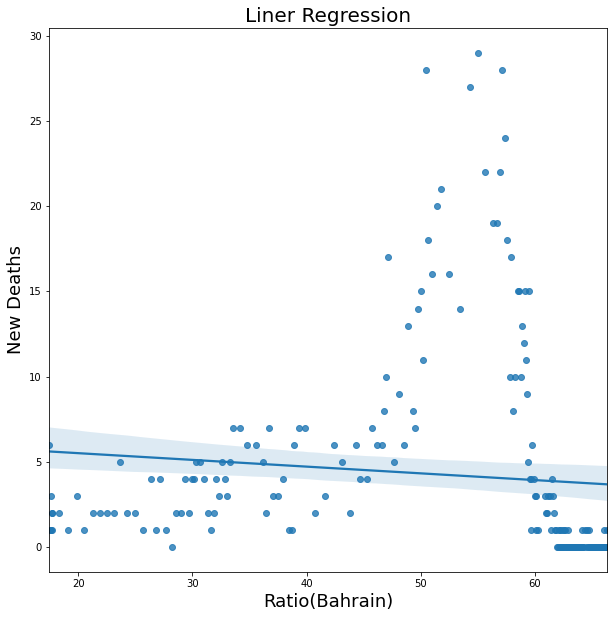

In [90]:
# Plot result

X = df_BHR['ratio']
y = df_BHR['New_deaths']

plt.figure(figsize=(10,10))
sns.regplot(x=X, y=y)

plt.xlabel('Ratio(Bahrain)',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Liner Regression',fontsize=20)

# Evaluation

In [91]:
# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

In [92]:
show_scores(model)

{'Training MAE': 0.7205436642076964,
 'Test MAE': 0.6974454172893856,
 'Training R^2': 0.0044254028042469695,
 'Test R^2': 0.024024398243467693}

# 2-Polynomial Regression

In [112]:
# Import Skcit-Learn methods we want to use in this notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
# Import useful Libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [113]:
df = pd.read_csv('covid_vaccination_vs_death_ratio.csv')

linearRegression

Coefficients: -0.5636885340470127
Intercept: 42.19522882799502


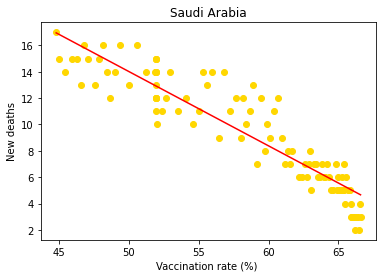

Mean absolute error: 1.28
Residual sum of squares (MSE): 2.54
R2-score: 0.85


In [117]:
# We put the data from Saudi in the mydf variable .
mydf = df[df.country == "Saudi Arabia"]
# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()
# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)
# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')
# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='gold') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='red')
plt.title("Saudi Arabia")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()
# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)
# Using Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")
# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")
# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")

Polynomial Regression

In [118]:
def plot_vaccine_mortality(country_name, df, degree=2):
    """
    This function receives the dataset and the name of the country and dgree then divides
    data into two parts the [test] and [train]. And a polynomial regression model applies to 
    training data.Then evaluate the model using test data and prints the results. 
    how to use:
    >>> plot_vaccine_mortality("Saudi", df, 8)
    """
    #---------------------------
    print(f"{country_name:-^80}")
    # Store country data in a variable 
    mydf = df[df.country == country_name]
    # Divide data randomly into two test and training sections 
    msk = np.random.rand(len(mydf)) < .8
    train = mydf[msk]
    test = mydf[~msk]
    # Identify the dependent(y) and independent variables(x) in the train dataframe
    train_x = np.asanyarray(train[['ratio']])
    train_y = np.asanyarray(train[['New_deaths']])
    # Identify the dependent(y) and non-dependent(x) variables in the test dataframe
    test_x = np.asanyarray(train[['ratio']])
    test_y = np.asanyarray(train[['New_deaths']])
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(train_x)
    # Make the model 
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    # Print The coefficients
    print ('Coefficients: ')
    for i, c in enumerate(clf.coef_[0]):
        if i: print(f"{c:->22.10f} * X^{i}")
    # Print The Intercept    
    print ('Intercept: ',clf.intercept_[0])
    # Constructing a scatterplot using train data with random color
    plt.scatter(train.ratio, train.New_deaths,  color= np.random.rand(3,))
    # Set the X axis using numpy:   np.arange(start, end, interval)
    XX = np.arange(train_x[0], train_x[-1], 0.1)
    # Set the Y axis using intercept and coefficients that we found in previous steps
    YY = clf.intercept_[0] 
    for d in range(1,degree+1):
        YY += clf.coef_[0][d]*np.power(XX, d)
    # On the previous scatterplot, we fit the regression model with red color. 
    plt.plot(XX, YY, '-r' )
    plt.title(country_name)
    plt.xlabel("Vaccination rate (%) ")
    plt.ylabel("New deaths")
    plt.show()
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(test_x)
    predict_y = clf.predict(test_x_poly)
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    MAE = np.mean(np.absolute(predict_y - test_y))  
    print(f"Mean absolute error: {MAE:.2f}")
    # Mean squared error
    MSE =  np.mean((predict_y - test_y) ** 2)
    print(f"Residual sum of squares (MSE): {MSE:.2f}")
    # R2-score
    r2 = r2_score(test_y, predict_y)
    print(f"R2-score: {r2:.2f}")
    #---------------------------
    print("-"*80)

----------------------------------Saudi Arabia----------------------------------
Coefficients: 
----------2.2557974049 * X^1
----------0.0247856731 * X^2
Intercept:  -36.732396926654644


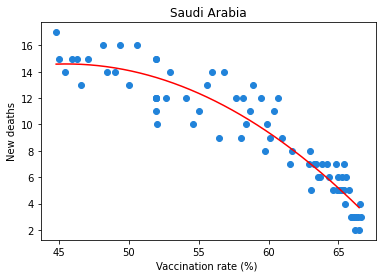

Mean absolute error: 1.16
Residual sum of squares (MSE): 2.00
R2-score: 0.88
--------------------------------------------------------------------------------


In [119]:
plot_vaccine_mortality("Saudi Arabia", df, 2)